# Project: Regression Analysis

NOTE: Feel free to use the internet when you find yourself stuck. There are many resources available to help you.

### A) We begin with using the regression analysis to predict the sales price of a house based on the features of the house. Our target column is 'Sale Amount'

1) Delete the columns in dataset that are not useful for regression analysis. [Be sure to delete sales ratio as it is completelty correlation with the Sale Amound and Assessed Amount columns] (use the drop method)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [5]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

/var/folders/_c/7_ds5bkj76x5hnpr0l5ftkz00000gn/T/ipykernel_53374/3549229310.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  housing_df = pd.read_csv('housing.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN


In [8]:
columns_to_drop = ["Serial Number","Date Recorded","Sales Ratio","Non Use Code","Assessor Remarks","OPM remarks"]
housing_df_cleaned = housing_df.drop(columns=columns_to_drop)
housing_df_cleaned.head()

,List Year,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Location
0,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,Commercial,NaN,NaN
1,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,NaN
2,2021,Avon,53 COTSWOLD WAY,329730.0,805000.0,Residential,Single Family,POINT (-72.846365959 41.781677018)
3,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,Residential,Condo,NaN
4,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,Residential,Single Family,NaN


2) create a new dataframe that contains the non-sparse columns of the dataset. (leave out the ADDRESS and LOCATION columns too, we will deal with them later) We will use this dataframe to run our first regression.<br> <br> <br>
a) delete all the rows that contain missing values. (use the dropna method)<br> <br>
b) Use the get_dummies method to convert the categorical columns into dummy columns. <br> <br>
c) check correlation between the features and ensure that none of the value are significant. (use the corr method)<br> <br>
d) split the data into training and test sets. (use the train_test_split method)<br> <br>
e) run the regression and evaluate the model. (use the LinearRegression method)<br> <br>
f) check the accuracy of the model. (use the score method)<br> <br>
g) check the coefficients of the model, and write about what they mean (use the coef_ method)

<br><br><br>

NOTE: Since this is a research study please document your steps and explain your findings. Use the markdown cells to write any notes or explanations as you are working through the project.

In [10]:
data_reg_1 = housing_df_cleaned.drop(columns=["Address","Location"])
data_reg_1.head()

,List Year,Town,Assessed Value,Sale Amount,Property Type,Residential Type
0,2020,Ansonia,150500.0,325000.0,Commercial,NaN
1,2020,Ashford,253000.0,430000.0,Residential,Single Family
2,2021,Avon,329730.0,805000.0,Residential,Single Family
3,2020,Avon,130400.0,179900.0,Residential,Condo
4,2020,Avon,619290.0,890000.0,Residential,Single Family


In [14]:
data_reg_1 = data_reg_1.dropna()
data_reg_1.head()

,List Year,Town,Assessed Value,Sale Amount,Property Type,Residential Type
1,2020,Ashford,253000.0,430000.0,Residential,Single Family
2,2021,Avon,329730.0,805000.0,Residential,Single Family
3,2020,Avon,130400.0,179900.0,Residential,Condo
4,2020,Avon,619290.0,890000.0,Residential,Single Family
5,2020,Avon,862330.0,1447500.0,Residential,Single Family


In [16]:
data_reg_1_encoded = pd.get_dummies(data_reg_1, columns=["Town","Property Type","Residential Type"])
data_reg_1_encoded.head()

,List Year,Assessed Value,Sale Amount,Town_***Unknown***,Town_Andover,Town_Ansonia,Town_Ashford,Town_Avon,Town_Barkhamsted,Town_Beacon Falls,...,Property Type_Four Family,Property Type_Residential,Property Type_Single Family,Property Type_Three Family,Property Type_Two Family,Residential Type_Condo,Residential Type_Four Family,Residential Type_Single Family,Residential Type_Three Family,Residential Type_Two Family
1,2020,253000.0,430000.0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,2021,329730.0,805000.0,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
3,2020,130400.0,179900.0,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
4,2020,619290.0,890000.0,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
5,2020,862330.0,1447500.0,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False


<Axes: >

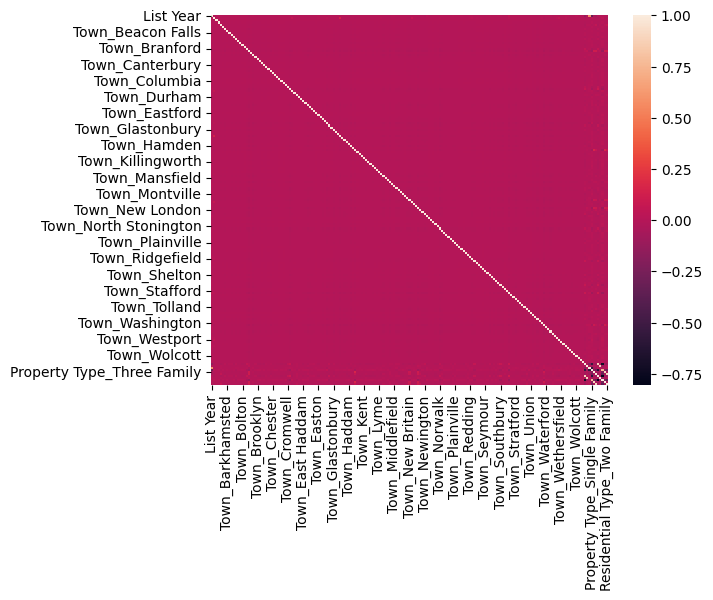

In [17]:
corr_data=data_reg_1_encoded.drop("Sale Amount", axis=1)
corr_1=corr_data.corr()
sns.heatmap(corr_1)

In [18]:
X = data_reg_1_encoded.drop("Sale Amount", axis=1) 
y = data_reg_1_encoded["Sale Amount"]
encoded_lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10) # splitting the data into training data and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 
encoded_lin_reg.fit(X_train, y_train)
print(f"score for the test data {encoded_lin_reg.score(X_test, y_test)}")
print(f"score for the train data {encoded_lin_reg.score(X_train, y_train)}")

(594247, 183) (66028, 183) (594247,) (66028,)
score for the test data 0.19745881277375898
score for the train data 0.15098414492905388


3) We will now deal with the ADDRESS columns. We will use the ADDRESS column to extract if the house is on a street, avenue, way etc. We will then use this information to create a new column in the dataframe that contains this information. We will then use this column to run a regression analysis.  <br> <br> <br>

    a) Isolate the address column and extract the type of street from the address. (use the str.split, str.replace methods)<br> <br>
    b) create a new column in the dataframe that contains the type of street. <br> <br>

Note: This tasks is a little more involved than the previous ones. There are lots of ways of going about this task so use your best judgement. <br> <br>


In [21]:
housing_df_cleaned.head()

,List Year,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Location
0,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,Commercial,NaN,NaN
1,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,NaN
2,2021,Avon,53 COTSWOLD WAY,329730.0,805000.0,Residential,Single Family,POINT (-72.846365959 41.781677018)
3,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,Residential,Condo,NaN
4,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,Residential,Single Family,NaN


In [34]:
def find_address_type(address):
    street_types = ['AVE', 'RD', 'ST', 'DR', 'LN', 'WAY', 'BLVD', 'CT', "DRIVE", "CIRCLE", "ROAD", "STREET", "AVENUE", "LANE", "COURT", "BOULEVARD", "CIRCLE", "TERRACE", "PLACE",]
    address=str(address)
    new_address=address.split(" ")
    if len(new_address) >= 3 and new_address[-1] in street_types:
        return new_address[-1]
    else:
        return "NONE"

def find_address_street_no(address):
    address=str(address)
    new_address=address.split(" ")
    if len(new_address) >= 3 and new_address[0].isdigit():
        return int(new_address[0])
    else:
        return 0
    
housing_df_cleaned["Address Type"]=housing_df_cleaned["Address"].apply(find_address_type)
housing_df_cleaned["Address Number"]=housing_df_cleaned["Address"].apply(find_address_street_no)
housing_df_cleaned.head()

,List Year,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Location,Address Type,Address Number
0,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,Commercial,NaN,NaN,AVE,230
1,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,NaN,RD,390
2,2021,Avon,53 COTSWOLD WAY,329730.0,805000.0,Residential,Single Family,POINT (-72.846365959 41.781677018),WAY,53
3,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,Residential,Condo,NaN,DRIVE,5
4,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,Residential,Single Family,NaN,DRIVE,111


In [35]:
data_reg_2 = housing_df_cleaned.drop(columns=["Address","Location"])
data_reg_2.head()


,List Year,Town,Assessed Value,Sale Amount,Property Type,Residential Type,Address Type,Address Number
0,2020,Ansonia,150500.0,325000.0,Commercial,NaN,AVE,230
1,2020,Ashford,253000.0,430000.0,Residential,Single Family,RD,390
2,2021,Avon,329730.0,805000.0,Residential,Single Family,WAY,53
3,2020,Avon,130400.0,179900.0,Residential,Condo,DRIVE,5
4,2020,Avon,619290.0,890000.0,Residential,Single Family,DRIVE,111


In [36]:
data_reg_2 = data_reg_2.dropna()
data_reg_2_encoded = pd.get_dummies(data_reg_2, columns=["Town","Property Type","Residential Type", "Address Type"])

In [37]:
data_reg_2_encoded = data_reg_2_encoded.dropna()
data_reg_2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660275 entries, 1 to 1054157
Columns: 204 entries, List Year to Address Type_WAY
dtypes: bool(200), float64(2), int64(2)
memory usage: 151.1 MB


In [39]:
X = data_reg_2_encoded.drop("Sale Amount", axis=1) 
y = data_reg_2_encoded["Sale Amount"]
encoded_lin_reg_1 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10) # splitting the data into training data and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 
encoded_lin_reg_1.fit(X_train, y_train)
print(f"score for the test data {encoded_lin_reg_1.score(X_test, y_test)}")
print(f"score for the train data {encoded_lin_reg_1.score(X_train, y_train)}")

(594247, 203) (66028, 203) (594247,) (66028,)
score for the test data 0.19959296122500814
score for the train data 0.15300294950235438


4) Train a regression model using the new column you created and evaluate the model. Does is perform better than the model you trained previously? <br> <br> <br>

5) Using a similar idea as the previous task, create new columns in the dataframe that contain the coordinates for the location of the house. Train a regression model using this column and evaluate the model. Does is perform better than the model you trained previously? <br> <br> <br>

In [42]:
def extract_lat_lon(location):
    if pd.isna(location):
        return pd.Series([None, None])
    location = location.replace('POINT (', '').replace(')', '')
    lon, lat = location.split()
    return pd.Series([float(lon), float(lat)]) # return a tuple of the coordinates

In [43]:
housing_df_cleaned.head()
housing_df_cleaned[["Long", "Lat"]] = housing_df_cleaned["Location"].apply(extract_lat_lon)


In [44]:
housing_df_cleaned.head()

,List Year,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Location,Address Type,Address Number,Long,Lat
0,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,Commercial,NaN,NaN,AVE,230,NaN,NaN
1,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,NaN,RD,390,NaN,NaN
2,2021,Avon,53 COTSWOLD WAY,329730.0,805000.0,Residential,Single Family,POINT (-72.846365959 41.781677018),WAY,53,-72.846366,41.781677
3,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,Residential,Condo,NaN,DRIVE,5,NaN,NaN
4,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,Residential,Single Family,NaN,DRIVE,111,NaN,NaN


In [46]:
data_reg_3 = housing_df_cleaned.drop(columns=["Address","Location"])
data_reg_3.head()

,List Year,Town,Assessed Value,Sale Amount,Property Type,Residential Type,Address Type,Address Number,Long,Lat
0,2020,Ansonia,150500.0,325000.0,Commercial,NaN,AVE,230,NaN,NaN
1,2020,Ashford,253000.0,430000.0,Residential,Single Family,RD,390,NaN,NaN
2,2021,Avon,329730.0,805000.0,Residential,Single Family,WAY,53,-72.846366,41.781677
3,2020,Avon,130400.0,179900.0,Residential,Condo,DRIVE,5,NaN,NaN
4,2020,Avon,619290.0,890000.0,Residential,Single Family,DRIVE,111,NaN,NaN


In [48]:
data_reg_3_encoded = pd.get_dummies(data_reg_3, columns=["Town","Property Type","Residential Type", "Address Type"])
data_reg_3_encoded = data_reg_3_encoded.dropna()
data_reg_3_encoded.head()

,List Year,Assessed Value,Sale Amount,Address Number,Long,Lat,Town_***Unknown***,Town_Andover,Town_Ansonia,Town_Ashford,...,Address Type_LANE,Address Type_LN,Address Type_NONE,Address Type_PLACE,Address Type_RD,Address Type_ROAD,Address Type_ST,Address Type_STREET,Address Type_TERRACE,Address Type_WAY
2,2021,329730.0,805000.0,53,-72.846366,41.781677,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10,2021,229900.0,561850.0,89,-73.212579,41.666960,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11,2021,111580.0,209000.0,43,-72.690802,41.821342,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,2020,168900.0,352000.0,39,-73.181970,41.646720,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
16,2021,208100.0,448000.0,25,-72.815906,41.268215,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [49]:
X = data_reg_3_encoded.drop("Sale Amount", axis=1) 
y = data_reg_3_encoded["Sale Amount"]
encoded_lin_reg_2 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10) # splitting the data into training data and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 
encoded_lin_reg_2.fit(X_train, y_train)
print(f"score for the test data {encoded_lin_reg_2.score(X_test, y_test)}")
print(f"score for the train data {encoded_lin_reg_2.score(X_train, y_train)}")

(229178, 210) (25465, 210) (229178,) (25465,)
score for the test data 0.30668110957317685
score for the train data 0.21879263561768258


6) BONUS: Include the 'Non Use Code' column in the regression analysis. Does it improve the model? <br> <br> <br>

NOTE: DO NOT WRITE ANY CODE FOR THE BELOW QUESTIONS. IT IS A THOUGHT EXPERIMENT TO HELP YOU THINK ABOUT MORE COMPLEX REGRESSION PROBLEMS.

### A) We now going to use Regression Analysis to predict the Location of a house based on the features of the house. Our target column is 'Longitute' and 'Latitude'

1) How should we deal with the 2 target columns? Hint: Try combining the columns in a meaningful way of provide a criterion to compare the elements of the combined columns <br> <br> <br>

2) Brainstorm ideas as to how we could deal with the sparse columns: [Assessor Remarks, OPM remarks]? What if we had access to ChatGPT inside our program could we leverage this to convert this data into a more useful format? <br> <br> <br>